In [21]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import datetime

### Import dataset

In [22]:
train= pd.read_csv('../data/train.csv')
store= pd.read_csv('../data/store.csv')
test= pd.read_csv('../data/test.csv')

It turns out that there ars some null values in the store dataset.

#### Lowercase Column Names

In [23]:
train.columns = [col.lower() for col in train.columns]
store.columns = [col.lower() for col in store.columns]
test.columns= [col.lower() for col in test.columns]

#### Checking data

There are some missing values in store and test dataset. In order to use machine learning these values should be replaced with something. In order to impute the null values, let's take a close look.

In [24]:
store.promo2sinceweek.fillna(0.0, inplace= True)
store.promo2sinceyear.fillna(2011, inplace= True)
store.promointerval.fillna('N/A', inplace= True)

Based on the observation, promo2 == 0 means that promo2 did not happen in the following period. By checking promo2 since week feature, every value were missing, which means that we can impute these values as 0.0. For promo2sinceyear column, we can impute the median for missing values. For the promointerval column, missing values indicate that promo2 did not happen, therefore, it makes sense to impute values as 'N/A'.

In [25]:
store.competitionopensincemonth.fillna(store.competitionopensincemonth.median(), inplace= True)
store.competitionopensinceyear.fillna(store.competitionopensinceyear.median(), inplace= True)

The features competitionopensincemonth and competitionopensinceyear, we can impute the values as the median. The reason why I impute the values as the median is the column competitiondistance does not have missing values, which implies that there should be competitors. 

In [26]:
store.competitiondistance.fillna(store.competitiondistance.median(), inplace= True)

For the same reason, imputing the missing values with the median works.

In [27]:
for col in ['competitionopensincemonth', 'competitionopensinceyear', 'promo2sinceweek', 'promo2sinceyear']:
    store[col]= store[col].astype(int)

It is okay to convert data types of week, month, and year to integer.

In [28]:
store.to_csv('../assets/clean_store.csv')

#### Average Sales 

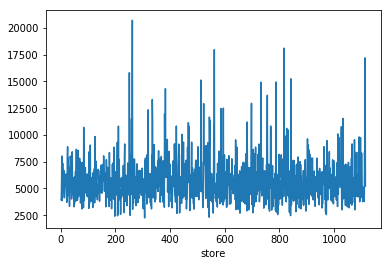

In [29]:
train.groupby('store').mean()['sales'].plot()

It turns out that the average sales gap among the stores can be massive. Why does this happen? It might be because the stores might have different sizes, different promo, the distance to competitors might be far, or customers prefer the company in general.

#### Average customer sales

In [30]:
per_customer= pd.DataFrame(train.groupby(by = 'store').sum()['sales']/train.groupby(by = 'store').sum()['customers'])

In [31]:
per_customer.columns= ['avg_customer_sales']

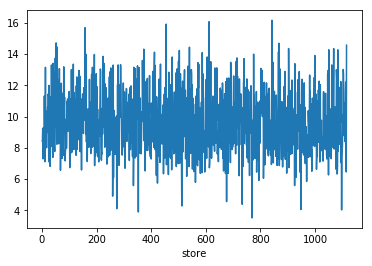

In [32]:
per_customer.avg_customer_sales.plot()

Similarly, expenditures between customer on average seem to have large gaps from stores to stores. In some stores, it turns out that customers tend to spend about 4, while some customers spend over 15 in some stores. However, it does not neccessarlily have the same pattern as average total sales based on stores. 

#### Merging data 

In [33]:
df= pd.merge(train, store, how= 'inner')

Merge data based on stores

#####  State holidays

In [34]:
df['stateholiday'] = df['stateholiday'].astype('object')

In [35]:
df['stateholiday'].replace(0, '0', inplace= True)

In [36]:
df['stateholiday'].replace('0', 'Noholiday', inplace= True)

There are two values that are essential same, but they are encoded in a different way, therefore, I replace values, so that I can have the same value.

### Export the data

In [19]:
df.to_csv('../assets/clean_df.csv')

##### Set Date as index

In [161]:
df['date'] = pd.to_datetime(df['date'])
df.set_index(df['date'],inplace=True)

In [162]:
df.drop(columns='date',inplace=True)

In [163]:
df.to_csv('../assets/date_df.csv')